In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\Downloads\\xAPI-Edu-Data.csv")

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
df.shape

(480, 17)

# Data Preprocessing

In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Gain Ratio  

In [7]:
def entropy(data):
    n = len(data)
    value_counts = data.value_counts()
    probabilities = value_counts / n
    return -sum(probabilities * np.log2(probabilities))

def gain_ratio(data, target_column, feature_column):
    # Calculate the entropy of the target column
    target_entropy = entropy(data[target_column])
    
    # Calculate the entropy of the feature column
    feature_entropy = 0
    total_examples = len(data)
    for value in data[feature_column].unique():
        subset = data[data[feature_column] == value]
        prob_value = len(subset) / total_examples
        feature_entropy += prob_value * entropy(subset[target_column])
    
    # Calculate the split information
    split_info = entropy(data[feature_column])
    
    # Calculate the gain ratio
    gain = target_entropy - feature_entropy
    gain_ratio_value = gain / split_info if split_info != 0 else 0
    
    return gain_ratio_value

# Example usage:
# Assuming you have a dataset in a pandas DataFrame called 'data' and the target column is 'success'
# Let's say we have three features 'feature1', 'feature2', and 'feature3'
# Calculate the gain ratio for each feature

features = df.drop('Class', axis=1).columns.tolist()
target_column = 'Class'
gain_ratios = {}

for feature in features:
    gain_ratios[feature] = gain_ratio(df, target_column, feature)

# Sort the features based on gain ratio in descending order
sorted_features = sorted(gain_ratios.items(), key=lambda x: x[1], reverse=True)

# Print the ranked features
for feature, gain_ratio_value in sorted_features:
    print(f"Feature: {feature}, Gain Ratio: {gain_ratio_value}")

Feature: StudentAbsenceDays, Gain Ratio: 0.40985604729775055
Feature: ParentAnsweringSurvey, Gain Ratio: 0.1521204182611172
Feature: Relation, Gain Ratio: 0.12910269555267578
Feature: ParentschoolSatisfaction, Gain Ratio: 0.11053268870561037
Feature: VisITedResources, Gain Ratio: 0.10899070630930605
Feature: raisedhands, Gain Ratio: 0.10543396982816983
Feature: AnnouncementsView, Gain Ratio: 0.0885844565039838
Feature: Discussion, Gain Ratio: 0.06962672542762965
Feature: gender, Gain Ratio: 0.054710963523470865
Feature: NationalITy, Gain Ratio: 0.05229393174567407
Feature: PlaceofBirth, Gain Ratio: 0.05076204757794688
Feature: Topic, Gain Ratio: 0.022524972793114124
Feature: GradeID, Gain Ratio: 0.01883022720159972
Feature: Semester, Gain Ratio: 0.011828438745121517
Feature: StageID, Gain Ratio: 0.008234863296715982
Feature: SectionID, Gain Ratio: 0.00572140234773254


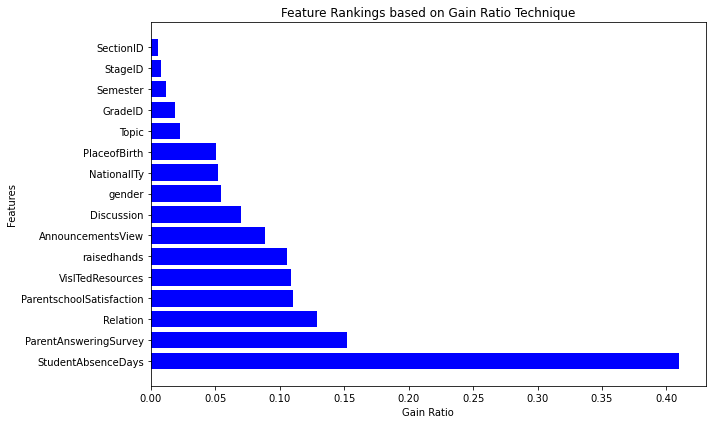

In [8]:
# Sort the features based on gain ratio in descending order
sorted_features = sorted(gain_ratios.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and gain ratio values
features = [feature for feature, _ in sorted_features]
gain_ratio_values = [gain_ratio_value for _, gain_ratio_value in sorted_features]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(features, gain_ratio_values, color='blue')
plt.xlabel('Gain Ratio')
plt.ylabel('Features')
plt.title('Feature Rankings based on Gain Ratio Technique')
plt.tight_layout()
plt.show()

# Data Transformation

# Data Mining Techniques

In [9]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns and apply Label Encoding
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col])

print(df)

     gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0         1            4             4        2        1          0      7   
1         1            4             4        2        1          0      7   
2         1            4             4        2        1          0      7   
3         1            4             4        2        1          0      7   
4         1            4             4        2        1          0      7   
..      ...          ...           ...      ...      ...        ...    ...   
475       0            3             3        1        5          0      2   
476       0            3             3        1        5          0      5   
477       0            3             3        1        5          0      5   
478       0            3             3        1        5          0      6   
479       0            3             3        1        5          0      6   

     Semester  Relation  raisedhands  VisITedResources  Announc

In [10]:
columns_to_drop = ['NationalITy','PlaceofBirth']
df = df.drop(columns=columns_to_drop)

# Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
X=df.drop('Class',axis=1)
y=df["Class"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\lenov\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Testing

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
pred = lr.predict(X_test)
l_acc=accuracy_score(y_test, pred)
print("Accuracy Score: ", l_acc)
cla=classification_report(y_test, pred)
print("CLASSIFICATION REPORT:",cla)
conf_matrix = confusion_matrix(y_test, pred)
print("Confusion Matrix:",conf_matrix)

Accuracy Score:  0.6875
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.59      0.66      0.62        35
           1       0.73      0.84      0.78        38
           2       0.72      0.62      0.67        71

    accuracy                           0.69       144
   macro avg       0.68      0.71      0.69       144
weighted avg       0.69      0.69      0.69       144

Confusion Matrix: [[23  1 11]
 [ 0 32  6]
 [16 11 44]]


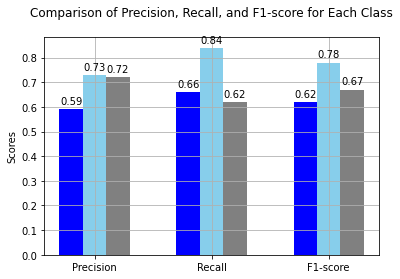

In [14]:
class0_precision = 0.59
class0_recall = 0.66
class0_f1 = 0.62

class1_precision = 0.73
class1_recall = 0.84
class1_f1 = 0.78

class2_precision = 0.72
class2_recall = 0.62
class2_f1 = 0.67

# Set the positions and width for the bars
positions = np.arange(3)
width = 0.2

# Create the grouped bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(positions - width, [class0_precision, class0_recall, class0_f1], width, color='blue')
rects2 = ax.bar(positions, [class1_precision, class1_recall, class1_f1], width, color='skyblue')
rects3 = ax.bar(positions + width, [class2_precision, class2_recall, class2_f1], width, color='grey')

# Add labels, title, and grid
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-score for Each Class\n')
ax.set_xticks(positions)
ax.set_xticklabels(['Precision', 'Recall', 'F1-score'])
ax.grid(True)

# Add values above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Training

In [15]:
pred_t = lr.predict(X_train)
acc_t=accuracy_score(y_train, pred_t)
print("Accuracy Score: ", acc_t)
cla=classification_report(y_train, pred_t)
print("CLASSIFICATION REPORT:",cla)
conf_matrix = confusion_matrix(y_train, pred_t)
print("Confusion Matrix:",conf_matrix)

Accuracy Score:  0.7321428571428571
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.72      0.71      0.72       107
           1       0.79      0.87      0.83        89
           2       0.69      0.66      0.68       140

    accuracy                           0.73       336
   macro avg       0.74      0.75      0.74       336
weighted avg       0.73      0.73      0.73       336

Confusion Matrix: [[76  2 29]
 [ 0 77 12]
 [29 18 93]]


# SVM

# Testing

In [16]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
s_acc = accuracy_score(y_test, y_pred)
print("Accuracy: ",s_acc)
cla=classification_report(y_test,y_pred)
print("CLASSIFICATION REPORT:",cla)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",conf_matrix)

Accuracy:  0.7777777777777778
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.70      0.86      0.77        35
           1       0.80      0.84      0.82        38
           2       0.82      0.70      0.76        71

    accuracy                           0.78       144
   macro avg       0.77      0.80      0.78       144
weighted avg       0.78      0.78      0.78       144

Confusion Matrix: [[30  0  5]
 [ 0 32  6]
 [13  8 50]]


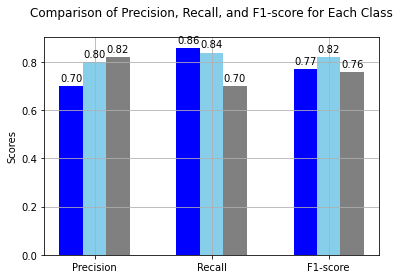

In [17]:
class0_precision = 0.70
class0_recall = 0.86
class0_f1 = 0.77

class1_precision = 0.80
class1_recall = 0.84
class1_f1 = 0.82

class2_precision = 0.82
class2_recall = 0.70
class2_f1 = 0.76

# Set the positions and width for the bars
positions = np.arange(3)
width = 0.2

# Create the grouped bar plot
fig, ax = plt.subplots()
rects1 = ax.bar(positions - width, [class0_precision, class0_recall, class0_f1], width, color='blue')
rects2 = ax.bar(positions, [class1_precision, class1_recall, class1_f1], width, color='skyblue')
rects3 = ax.bar(positions + width, [class2_precision, class2_recall, class2_f1], width, color='grey')

# Add labels, title, and grid
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-score for Each Class\n')
ax.set_xticks(positions)
ax.set_xticklabels(['Precision', 'Recall', 'F1-score'])
ax.grid(True)

# Add values above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

# Training

In [18]:
y_pred_t=svm.predict(X_train)
acc_t = accuracy_score(y_train, y_pred_t)
print("Accuracy: ",acc_t)
cla=classification_report(y_train,y_pred_t)
print("CLASSIFICATION REPORT:",cla)
conf_matrix = confusion_matrix(y_train, y_pred_t)
print("Confusion Matrix:",conf_matrix)

Accuracy:  0.7827380952380952
CLASSIFICATION REPORT:               precision    recall  f1-score   support

           0       0.73      0.79      0.76       107
           1       0.86      0.93      0.89        89
           2       0.77      0.68      0.72       140

    accuracy                           0.78       336
   macro avg       0.79      0.80      0.79       336
weighted avg       0.78      0.78      0.78       336

Confusion Matrix: [[85  0 22]
 [ 0 83  6]
 [31 14 95]]


# Comparison of accuracies of both the models

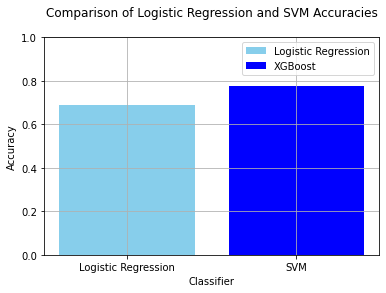

In [19]:
# Create a bar plot for accuracies
plt.bar(['Logistic Regression'], [l_acc], color='skyblue', label='Logistic Regression')
plt.bar(['SVM'], [s_acc], color='blue', label='XGBoost')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Logistic Regression and SVM Accuracies\n')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

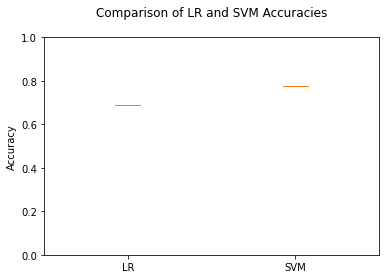

In [21]:
# Store the accuracies in a list of lists
accuracies = [[l_acc], [s_acc]]

# Create a box plot for accuracies of both models without outliers
plt.boxplot(accuracies, labels=['LR', 'SVM'], patch_artist=True)
plt.ylabel('Accuracy')
plt.title('Comparison of LR and SVM Accuracies\n')
plt.ylim(0, 1)
plt.grid(False)
plt.show()